## Setup and Import Libraries

In [1]:
from openai import OpenAI
from dotenv import load_dotenv, find_dotenv

In [2]:
_ = load_dotenv(find_dotenv())

In [3]:
client = OpenAI()

## Creating File

In [4]:
filename = 'SP500_Prices_5Year.csv'

In [5]:
file = client.files.create(
    file=open(file=filename, mode='rb'),
    purpose='assistants'
)

In [6]:
file

FileObject(id='file-Pnzc8CEtEbYoqVm4eL4nMY', bytes=94752, created_at=1742248931, filename='SP500_Prices_5Year.csv', object='file', purpose='assistants', status='processed', expires_at=None, status_details=None)

In [7]:
file.id

'file-Pnzc8CEtEbYoqVm4eL4nMY'

## Creating Assistant

In [8]:
assistant = client.beta.assistants.create(
    name='Stock Visualizer',
    instructions='You use code and files to help visualize stock data',
    model='gpt-3.5-turbo',
    tools=[{'type':'file_search'}, {'type':'code_interpreter'}]
)

## Creating Thread and Message

In [9]:
thread = client.beta.threads.create()

In [11]:
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role='user',
    content='Can you create a plot of the historical adjusted closing price of the SP500?',
    attachments=[{"file_id": file.id, "tools": [{'type':'code_interpreter'}]}]
)

## Create Run

In [12]:
run = client.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assistant.id
)

In [13]:
run = client.beta.threads.runs.retrieve(
    thread_id=thread.id,
    run_id=run.id,
)

In [17]:
run.status

'in_progress'

## Display Response

In [18]:
messages = client.beta.threads.messages.list(
    thread_id=thread.id,
    order='asc'
)

In [20]:
for message in messages:
    print(message)
    print("\n")

Message(id='msg_MH9WDPNjR89BqFxqOSdG0PcW', assistant_id=None, attachments=[Attachment(file_id='file-Pnzc8CEtEbYoqVm4eL4nMY', tools=[CodeInterpreterTool(type='code_interpreter')])], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='Can you create a plot of the historical adjusted closing price of the SP500?'), type='text')], created_at=1742249121, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='user', run_id=None, status=None, thread_id='thread_efpFPFvc9rT09Me3hURV2iuJ')


Message(id='msg_0Kw4wov4XCabiqH1rj7CuKSd', assistant_id='asst_M7FbXyttmXLZcor22JSt1grD', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value="I will load the data from the file you uploaded to visualize the historical adjusted closing price of the S&P 500. Let's start by loading and examining the data to understand its structure."), type='text')], created_at=1742249175, incomplete_at=None, incomplete_details=N

## Retrieve Single Message

In [21]:
message = client.beta.threads.messages.retrieve(
    message_id='msg_5CUshKUK45O9Cr4EaXWEHd3J',
    thread_id='thread_efpFPFvc9rT09Me3hURV2iuJ'
)

In [22]:
message.content

[ImageFileContentBlock(image_file=ImageFile(file_id='file-Nsn2bUjP7MGnLsx17WzSUF', detail=None), type='image_file'),
 TextContentBlock(text=Text(annotations=[], value='Here is the plot showing the historical adjusted closing price of the S&P 500. The x-axis represents the dates, and the y-axis represents the adjusted closing prices. The plot provides an overview of how the adjusted closing price has changed over time.'), type='text')]

In [23]:
message.content[0]

ImageFileContentBlock(image_file=ImageFile(file_id='file-Nsn2bUjP7MGnLsx17WzSUF', detail=None), type='image_file')

In [25]:
message.content[1].text.value

'Here is the plot showing the historical adjusted closing price of the S&P 500. The x-axis represents the dates, and the y-axis represents the adjusted closing prices. The plot provides an overview of how the adjusted closing price has changed over time.'

In [27]:
myfile = client.files.content(file_id='file-Nsn2bUjP7MGnLsx17WzSUF')

In [28]:
#myfile.content

In [29]:
with open('example_image.png', 'wb') as file:
    file.write(myfile.content)

## Displaying Image

In [30]:
from IPython.display import Image

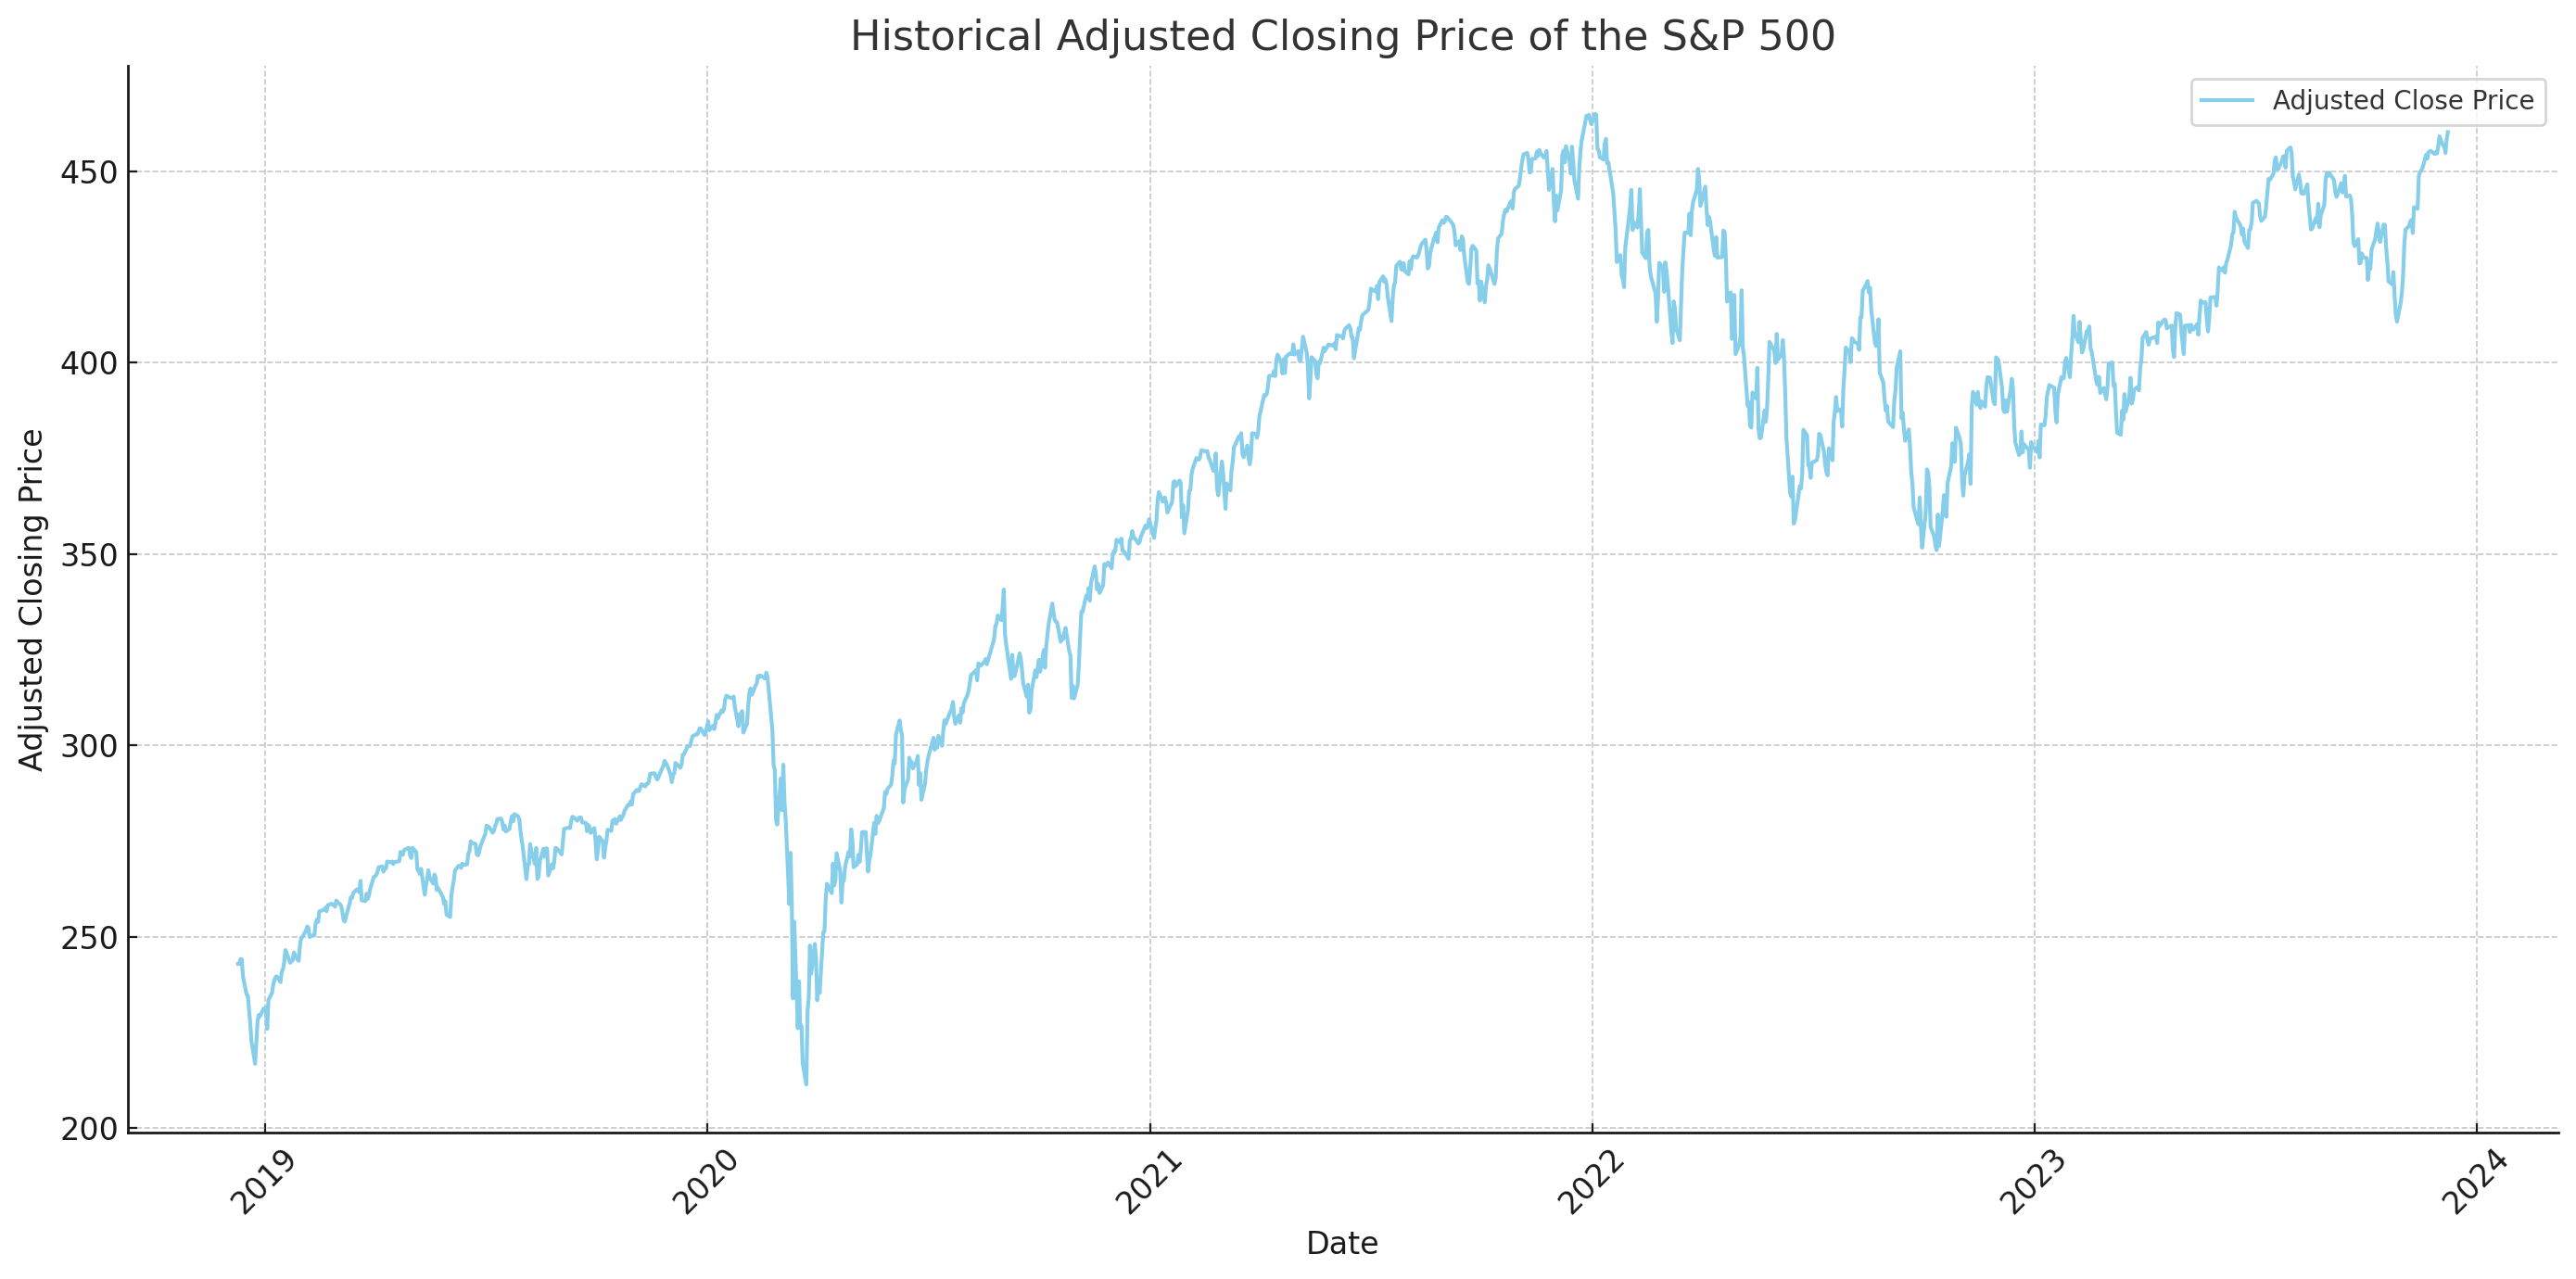

In [31]:
Image(filename='example_image.png')

## Delete Assistant

In [32]:
response = client.beta.assistants.delete(
    assistant_id=assistant.id
)

In [33]:
response

AssistantDeleted(id='asst_M7FbXyttmXLZcor22JSt1grD', deleted=True, object='assistant.deleted')